In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from mlxtend.frequent_patterns import apriori, association_rules

In [42]:
# Carregando o dataset de treino
train_df = pd.read_csv("train.csv")


### 1. Análise Exploratória de Dados (EDA)

In [38]:
# Verificando as primeiras linhas
display(train_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
# Informações gerais
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

In [40]:
# Verificando valores nulos
print("Valores nulos por coluna:")
print(train_df.isnull().sum())

Valores nulos por coluna:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [41]:
# Análise estatística básica
display(train_df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


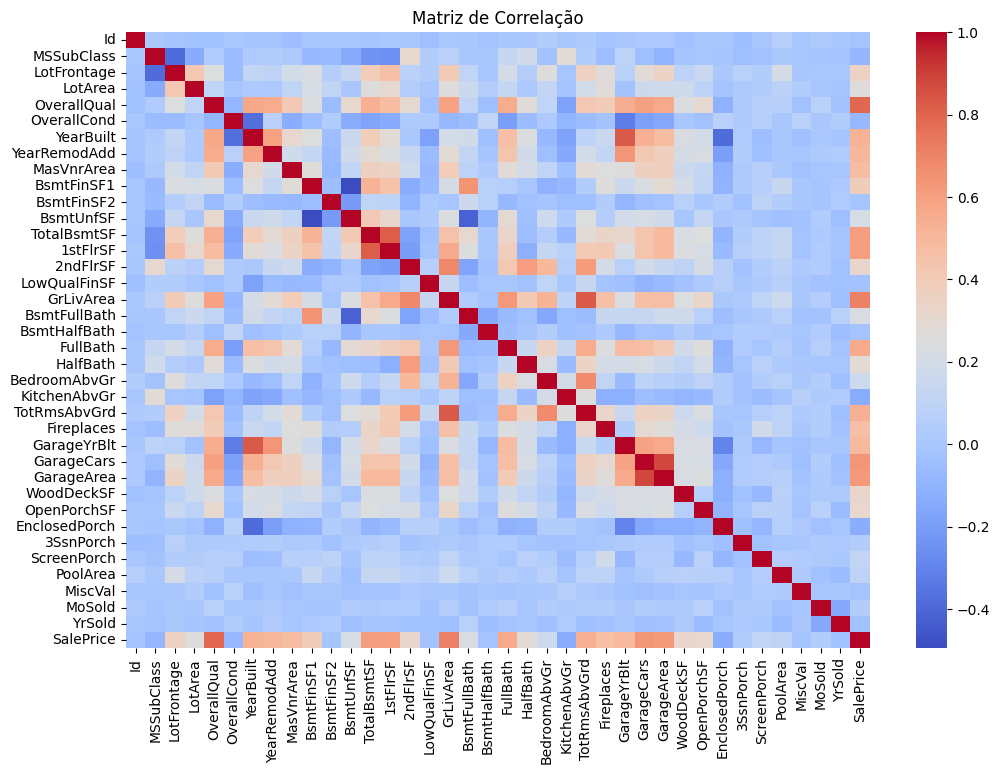

In [9]:
# Matriz de correlação (apenas para variáveis numéricas)
numeric_df = train_df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação")
plt.show()

### 2. Feature Engineering

In [10]:
# Preenchendo valores nulos simples (exemplo: substituindo por 0 ou média)
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

In [11]:
# Transformando variáveis categóricas em numéricas (One Hot Encoding)
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

### 3. Aprendizagem Supervisionada - Regressão Linear Múltipla

In [12]:
# Escolhendo algumas variáveis numéricas significativas
features = ['OverallQual', 'GrLivArea', 'GarageCars']
X = train_df[features]
y = train_df['SalePrice']

In [14]:
modelo_regression = LinearRegression()
modelo_regression.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Avaliando o modelo de regressão
y_pred = modelo_regression.predict(X)
print("\nRegressão Linear - Coeficientes:", modelo_regression.coef_)
print("Intercepto:", modelo_regression.intercept_)
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))


Regressão Linear - Coeficientes: [27104.82597153    50.67421142 21298.95976754]
Intercepto: -98832.49325495961
MSE: 1645634055.5317597
R²: 0.7390694117518739


### 4. Aprendizagem Supervisionada - Classificação Binária

In [20]:
limite_preco = y.median()
train_df['ClassePreco'] = (train_df['SalePrice'] >= limite_preco).astype(int)

In [21]:
X_class = train_df[features]
y_class = train_df['ClassePreco']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [23]:
modelo_class = LogisticRegression(max_iter=1000)
modelo_class.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_pred_class = modelo_class.predict(X_test)
print("\nClassificação - Acurácia:", accuracy_score(y_test, y_pred_class))


Classificação - Acurácia: 0.8881278538812786


### 5. Aprendizagem Não Supervisionada - Clusterização (KMeans)

In [25]:
X_cluster = train_df[features].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
train_df['Cluster'] = kmeans.fit_predict(X_cluster)

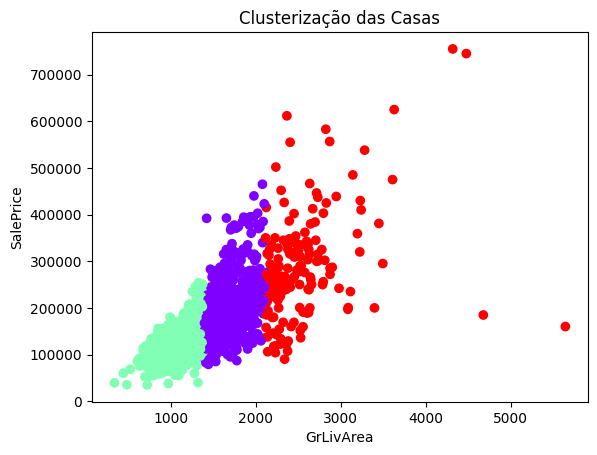

In [26]:
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], c=train_df['Cluster'], cmap='rainbow')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Clusterização das Casas')
plt.show()

### 6. Redução de Dimensionalidade - PCA

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

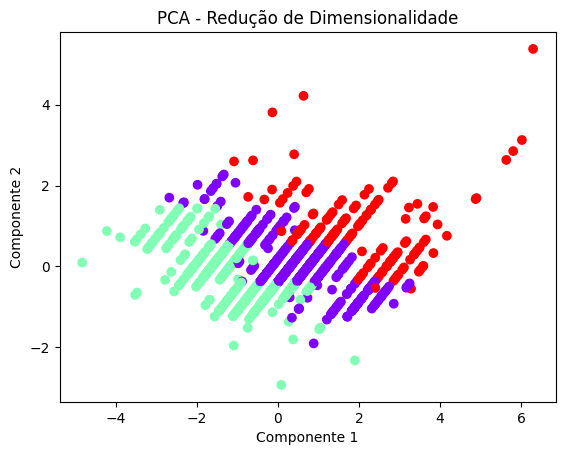

In [29]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['Cluster'], cmap='rainbow')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA - Redução de Dimensionalidade')
plt.show()

### 7. Análise de Outliers - Local Outlier Factor

In [30]:
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(X_cluster)
train_df['Outlier'] = outlier_labels

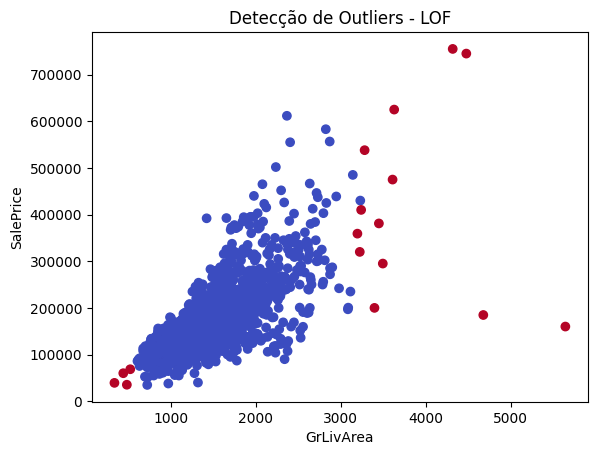

In [31]:
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], c=(train_df['Outlier'] == -1), cmap='coolwarm')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Detecção de Outliers - LOF')
plt.show()

### 8. Análise de Associação - Apriori (Transformando variáveis categóricas)

In [32]:
# Criando um dataset pequeno apenas com algumas colunas categóricas para o exemplo
categorical_cols = ['Neighborhood', 'HouseStyle', 'BldgType']
categorical_df = train_df[categorical_cols]

In [33]:
# Convertendo para One-Hot Encoding
onehot_df = pd.get_dummies(categorical_df)

In [34]:
# Ajustando o Apriori: binário (0 ou 1)
freq_items = apriori(onehot_df, min_support=0.05, use_colnames=True)
rules = association_rules(freq_items, metric="lift", min_threshold=1.0)

In [35]:
print("\nRegras de Associação:")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Regras de Associação:


,antecedents,consequents,support,confidence,lift
0,(Neighborhood_CollgCr),(HouseStyle_1Story),0.062329,0.606667,1.220018
1,(HouseStyle_1Story),(Neighborhood_CollgCr),0.062329,0.125344,1.220018
2,(BldgType_1Fam),(Neighborhood_CollgCr),0.095890,0.114754,1.116940
3,(Neighborhood_CollgCr),(BldgType_1Fam),0.095890,0.933333,1.116940
4,(BldgType_1Fam),(Neighborhood_Gilbert),0.053425,0.063934,1.181573
5,(Neighborhood_Gilbert),(BldgType_1Fam),0.053425,0.987342,1.181573
6,(Neighborhood_NAmes),(HouseStyle_1Story),0.108904,0.706667,1.421120
7,(HouseStyle_1Story),(Neighborhood_NAmes),0.108904,0.219008,1.421120
8,(Neighborhood_NAmes),(BldgType_1Fam),0.140411,0.911111,1.090346
9,(BldgType_1Fam),(Neighborhood_NAmes),0.140411,0.168033,1.090346


### 9. Conclusões Finais

In [36]:
print("\nConclusões:")
print("- As variáveis 'OverallQual', 'GrLivArea' e 'GarageCars' têm boa relação com o preço.")
print("- O modelo de Regressão Múltipla obteve um bom R².")
print("- Na classificação, obtivemos uma acurácia interessante para um primeiro modelo.")
print("- A clusterização indicou grupos de casas com características semelhantes.")
print("- O PCA ajudou na visualização de agrupamentos.")
print("- O LOF identificou potenciais outliers nos dados.")
print("- O Apriori revelou algumas associações interessantes entre as categorias das casas.")


Conclusões:
- As variáveis 'OverallQual', 'GrLivArea' e 'GarageCars' têm boa relação com o preço.
- O modelo de Regressão Múltipla obteve um bom R².
- Na classificação, obtivemos uma acurácia interessante para um primeiro modelo.
- A clusterização indicou grupos de casas com características semelhantes.
- O PCA ajudou na visualização de agrupamentos.
- O LOF identificou potenciais outliers nos dados.
- O Apriori revelou algumas associações interessantes entre as categorias das casas.
